In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [215]:
cars = pd.read_csv('cars.csv')

In [216]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [217]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [218]:
# transform model_year to full year
cars.model_year.min(), cars.model_year.max()

(70, 82)

In [219]:
cars['model_year'] = (cars.model_year +1900)

Text(0, 0.5, 'horsepower')

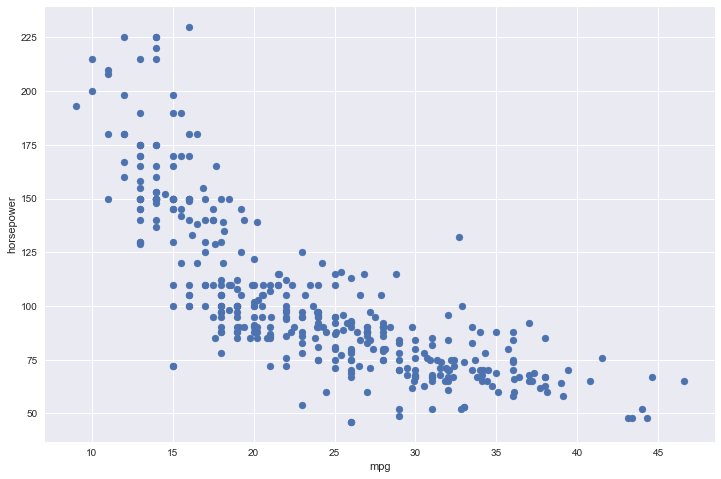

In [220]:
# mpg and horsepower
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.scatter(x='mpg',y='horsepower',data=cars)
plt.xlabel('mpg')
plt.ylabel('horsepower')

In [221]:
cars['gpm'] = ((np.reciprocal(cars.mpg))*100)

In [222]:
cars.gpm=cars.gpm.round(2)

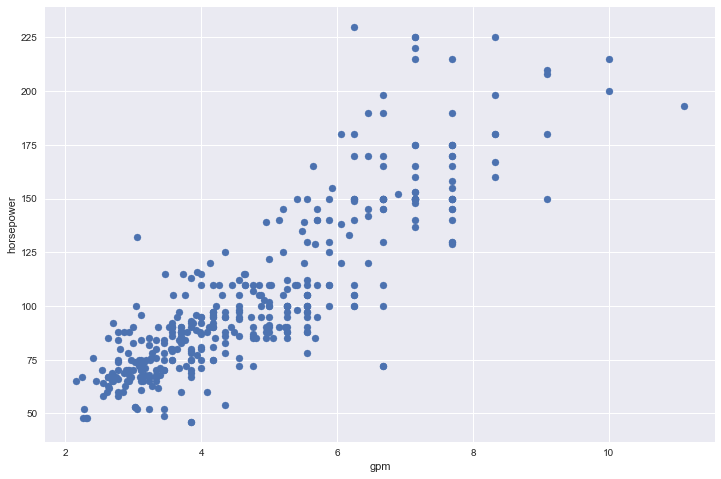

In [223]:
# gpm and horsepower
plt.figure(figsize=(12,8))
plt.scatter(x='gpm',y='horsepower',data=cars)
plt.xlabel('gpm')
plt.ylabel('horsepower');

In [224]:
# new manufactural name column
cars.name.value_counts()

ford pinto           6
amc matador          5
vw rabbit            5
toyota corolla       5
ford maverick        5
                    ..
chevrolet camaro     1
datsun 810 maxima    1
ford pinto (sw)      1
mazda rx-7 gs        1
ford country         1
Name: name, Length: 300, dtype: int64

In [225]:
#cars['manufacturer']=cars['name'].str.split(' ').apply(lambda x:x[0])
cars['manufacturer']=cars['name'].str.split(" ", n=1, expand=True)[0]

In [226]:
# new continent column
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [227]:
mapper = {'usa':'North America', 'japan':'Asia','europe':'Europe'}
cars['continent']=cars.origin.map(mapper)

In [228]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,North America
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,North America
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,North America
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,North America
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,North America


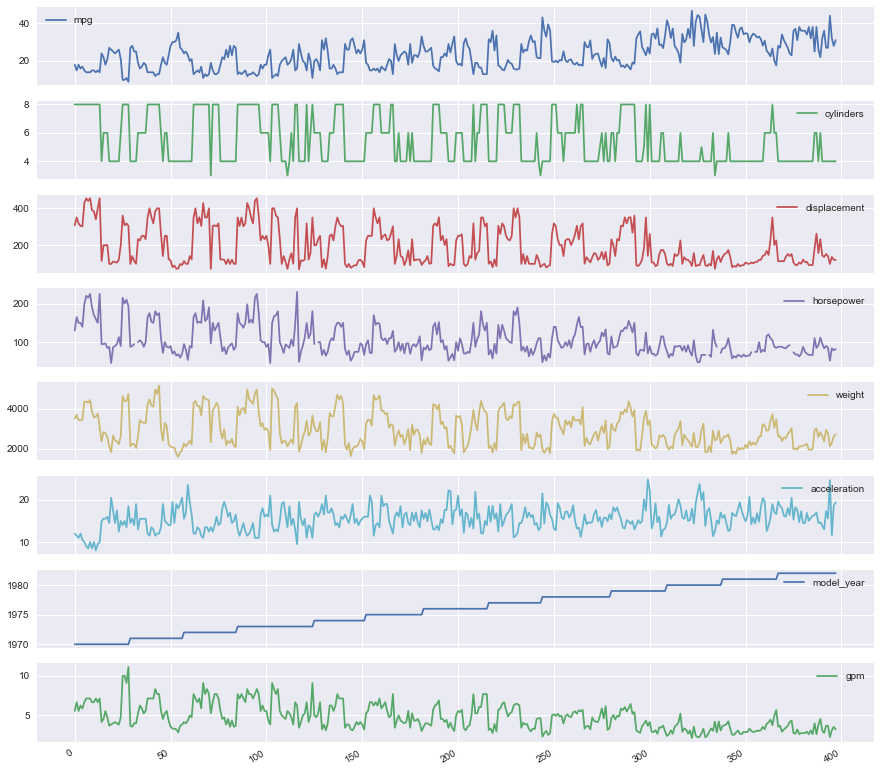

In [229]:
# detect outliers
cars.plot(figsize = (15,15), subplots = True)
plt.show()

In [230]:
IQR = cars.horsepower.quantile(0.75)-cars.horsepower.quantile(0.25)
upper_bound = cars.horsepower.quantile(0.75) + IQR*1.5
upper_bound, IQR

(202.5, 51.0)

<AxesSubplot:>

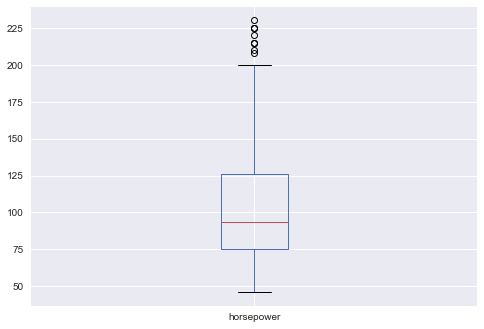

In [231]:
cars.horsepower.plot(kind='box')

In [232]:
# outliers exceeding upper boundary
cars[cars.horsepower>202.5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent
6,14.0,8,454.0,220.0,4354,9.0,1970,usa,chevrolet impala,7.14,chevrolet,North America
7,14.0,8,440.0,215.0,4312,8.5,1970,usa,plymouth fury iii,7.14,plymouth,North America
8,14.0,8,455.0,225.0,4425,10.0,1970,usa,pontiac catalina,7.14,pontiac,North America
13,14.0,8,455.0,225.0,3086,10.0,1970,usa,buick estate wagon (sw),7.14,buick,North America
25,10.0,8,360.0,215.0,4615,14.0,1970,usa,ford f250,10.00,ford,North America
27,11.0,8,318.0,210.0,4382,13.5,1970,usa,dodge d200,9.09,dodge,North America
67,11.0,8,429.0,208.0,4633,11.0,1972,usa,mercury marquis,9.09,mercury,North America
94,13.0,8,440.0,215.0,4735,11.0,1973,usa,chrysler new yorker brougham,7.69,chrysler,North America
95,12.0,8,455.0,225.0,4951,11.0,1973,usa,buick electra 225 custom,8.33,buick,North America
116,16.0,8,400.0,230.0,4278,9.5,1973,usa,pontiac grand prix,6.25,pontiac,North America


<AxesSubplot:>

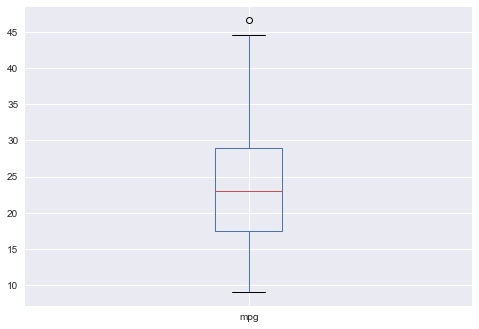

In [233]:
cars.mpg.plot(kind='box')

In [234]:
IQR = cars.mpg.quantile(0.75)-cars.mpg.quantile(0.25)
upper_bound = cars.mpg.quantile(0.75) + IQR*1.5
upper_bound, IQR

(46.25, 11.5)

In [235]:
# outlier exceeding upper boundary
cars[cars.mpg>46.25]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent
322,46.6,4,86.0,65.0,2110,17.9,1980,japan,mazda glc,2.15,mazda,Asia


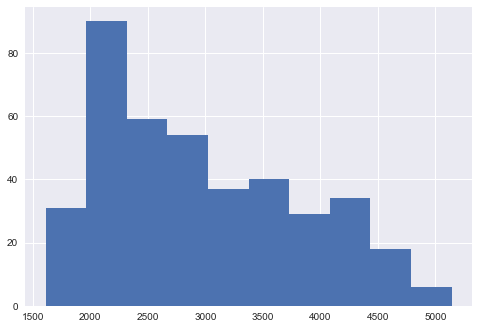

In [236]:
# bin the weight column
cars.weight.hist();

In [237]:
cars.weight.min(), cars.weight.max()

(1613, 5140)

In [238]:
cars['weight_cat']=pd.qcut(cars.weight,[0,0.25,0.75,1],labels=['light','medium','heavy'])

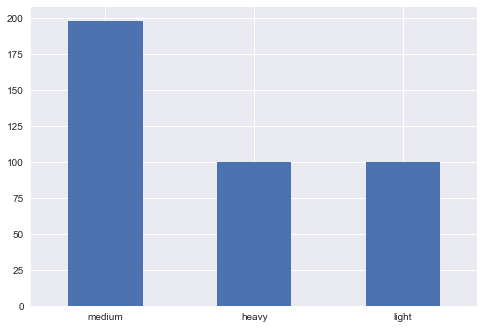

In [239]:
cars.weight_cat.value_counts().plot(kind='bar')
plt.xticks(rotation=0);

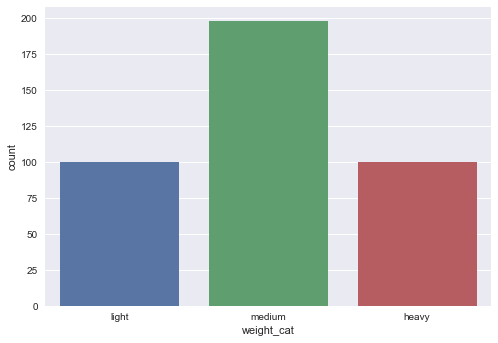

In [240]:
import seaborn as sns
sns.countplot(x=cars.weight_cat)
plt.show()

In [241]:
# drop "cylinders", "displacement", "weight", "acceleration", "name", "mpg"
cars_new=cars.drop(labels=["cylinders", "displacement", "weight", "acceleration", "name", "mpg"], axis=1)

In [242]:
cars_new.head()

,horsepower,model_year,origin,gpm,manufacturer,continent,weight_cat
0,130.0,1970,usa,5.56,chevrolet,North America,medium
1,165.0,1970,usa,6.67,buick,North America,heavy
2,150.0,1970,usa,5.56,plymouth,North America,medium
3,150.0,1970,usa,6.25,amc,North America,medium
4,140.0,1970,usa,5.88,ford,North America,medium


In [243]:
# scale horsepower and gpm
scaled_columns=cars[['horsepower','gpm']]

In [244]:
scaled_columns

,horsepower,gpm
0,130.0,5.56
1,165.0,6.67
2,150.0,5.56
3,150.0,6.25
4,140.0,5.88
...,...,...
393,86.0,3.70
394,52.0,2.27
395,84.0,3.12
396,79.0,3.57


Text(0, 0.5, 'gpm')

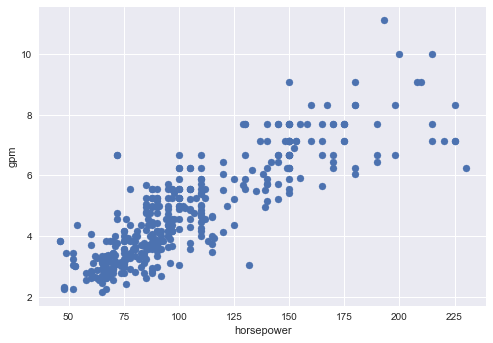

In [245]:
plt.scatter(x='horsepower', y='gpm', data=cars)
plt.xlabel('horsepower')
plt.ylabel('gpm')

In [246]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_columns = scaler.fit_transform(scaled_columns)

In [250]:
scaled_columns[:5]

array([[0.66413273, 0.47862344],
       [1.57459447, 1.1487539 ],
       [1.18439658, 0.47862344],
       [1.18439658, 0.89519103],
       [0.92426466, 0.67181421]])

In [251]:
horsepower_gpm=pd.DataFrame(scaled_columns,columns=['horsepower','gpm'])

In [252]:
horsepower_gpm.head()

,horsepower,gpm
0,0.664133,0.478623
1,1.574594,1.148754
2,1.184397,0.478623
3,1.184397,0.895191
4,0.924265,0.671814


Text(0, 0.5, 'gpm')

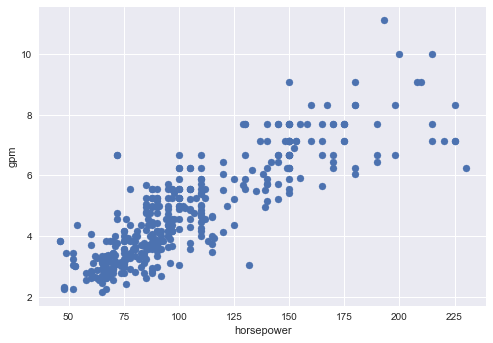

In [253]:
plt.scatter(x='horsepower', y='gpm', data=cars)
plt.xlabel('horsepower')
plt.ylabel('gpm')

<AxesSubplot:xlabel='horsepower', ylabel='gpm'>

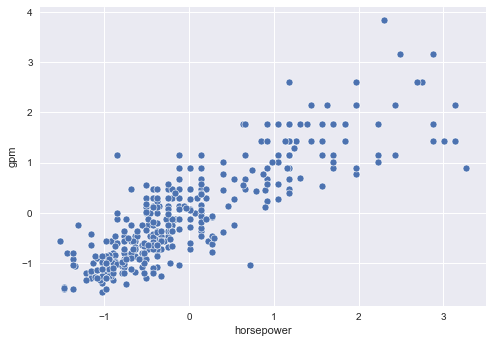

In [255]:
sns.scatterplot(x='horsepower',y='gpm',data=horsepower_gpm)

<AxesSubplot:>

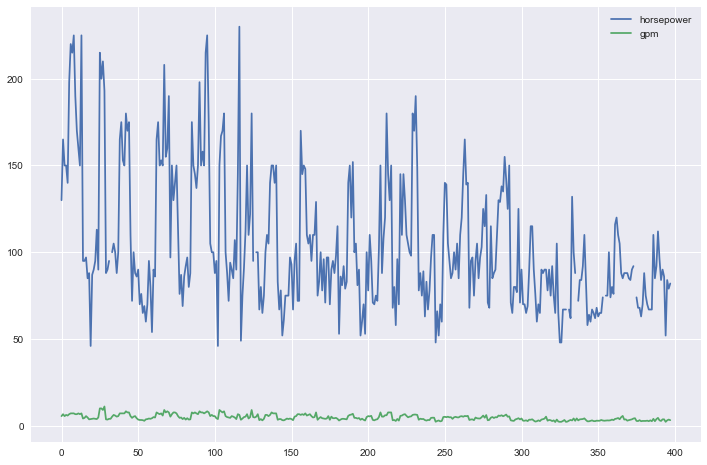

In [257]:
cars[['horsepower','gpm']].plot(figsize=(12,8))

<AxesSubplot:>

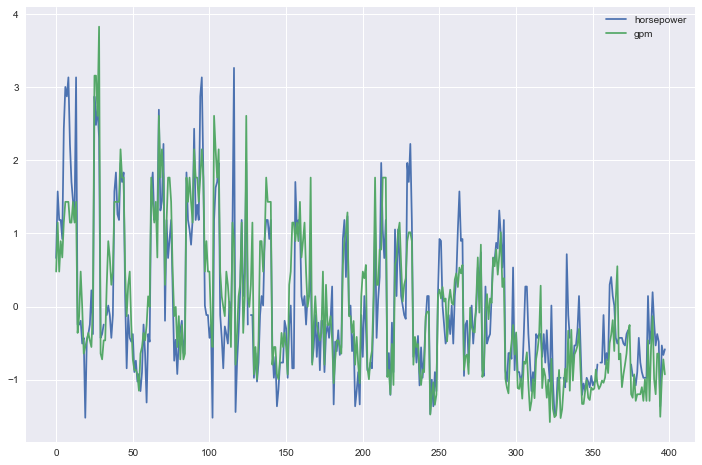

In [258]:
horsepower_gpm.plot(figsize=(12,8))

In [259]:
# one hot encode model_year and origin
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,North America,medium
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,North America,heavy
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,North America,medium
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,North America,medium
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,North America,medium


In [262]:
cars.model_year.nunique(), cars.origin.nunique()

(13, 3)

In [266]:
cars=pd.get_dummies(cars, columns=['origin','model_year'],prefix=['origin','year'],drop_first=True)

In [267]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   name          398 non-null    object  
 7   gpm           398 non-null    float64 
 8   manufacturer  398 non-null    object  
 9   continent     398 non-null    object  
 10  weight_cat    398 non-null    category
 11  origin_japan  398 non-null    uint8   
 12  origin_usa    398 non-null    uint8   
 13  year_1971     398 non-null    uint8   
 14  year_1972     398 non-null    uint8   
 15  year_1973     398 non-null    uint8   
 16  year_1974     398 non-null    uint8   
 17  year_1975     398 non-null    uint8   
 18  year_1976 